In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/StudentPerformanceFactors.csv')

### Reading And Understanding The Dataset


In [3]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Univariate Analysis

### Histogram

In [16]:
num_columns=df.select_dtypes(include='int64').columns
num_columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

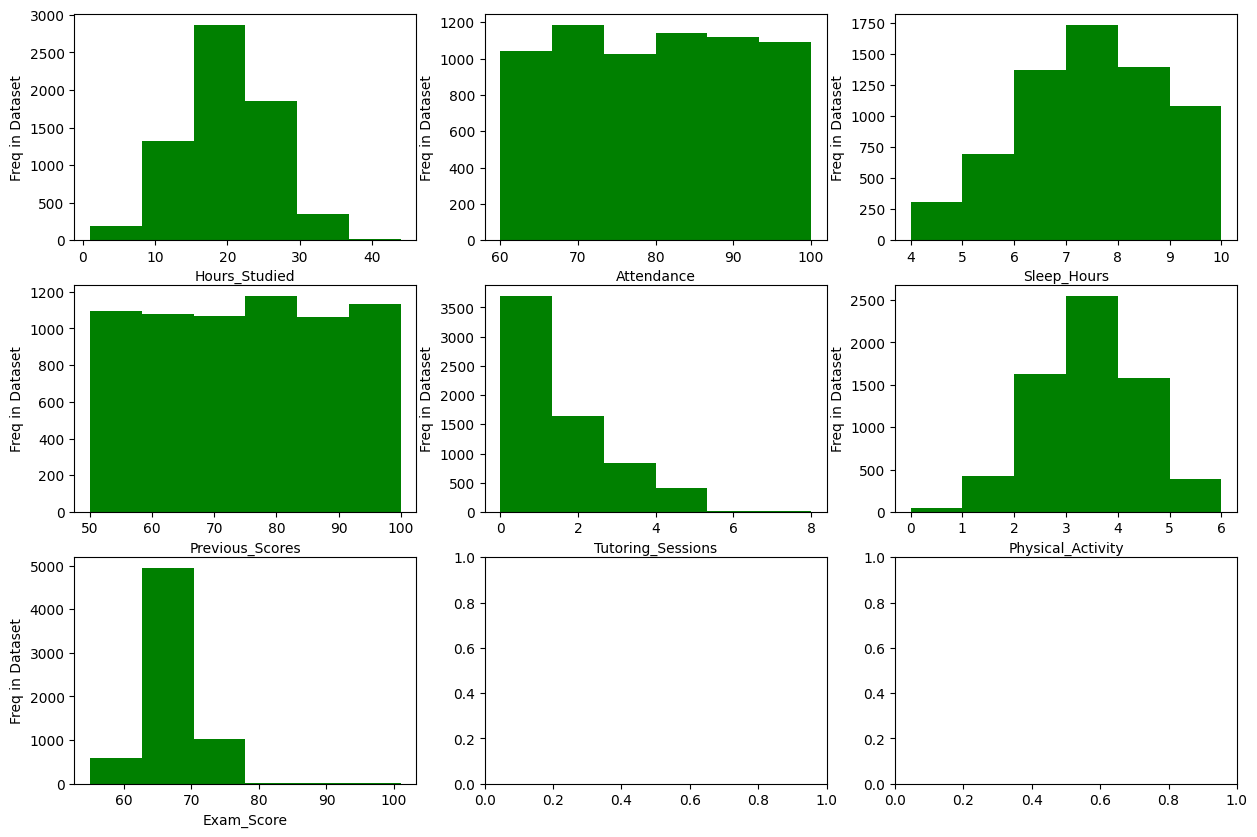

In [35]:
fig,ax=plt.subplots(3,3,figsize=(15,10))
i=0
j=0
for col in num_columns:
  ax[i][j].hist(df[col],bins=6,color='g')
  ax[i][j].set_xlabel(f"{col}")
  ax[i][j].set_ylabel("Freq in Dataset")
  j=j+1
  if j==3:
    i=i+1
    j=0
plt.show()

### Box Plots

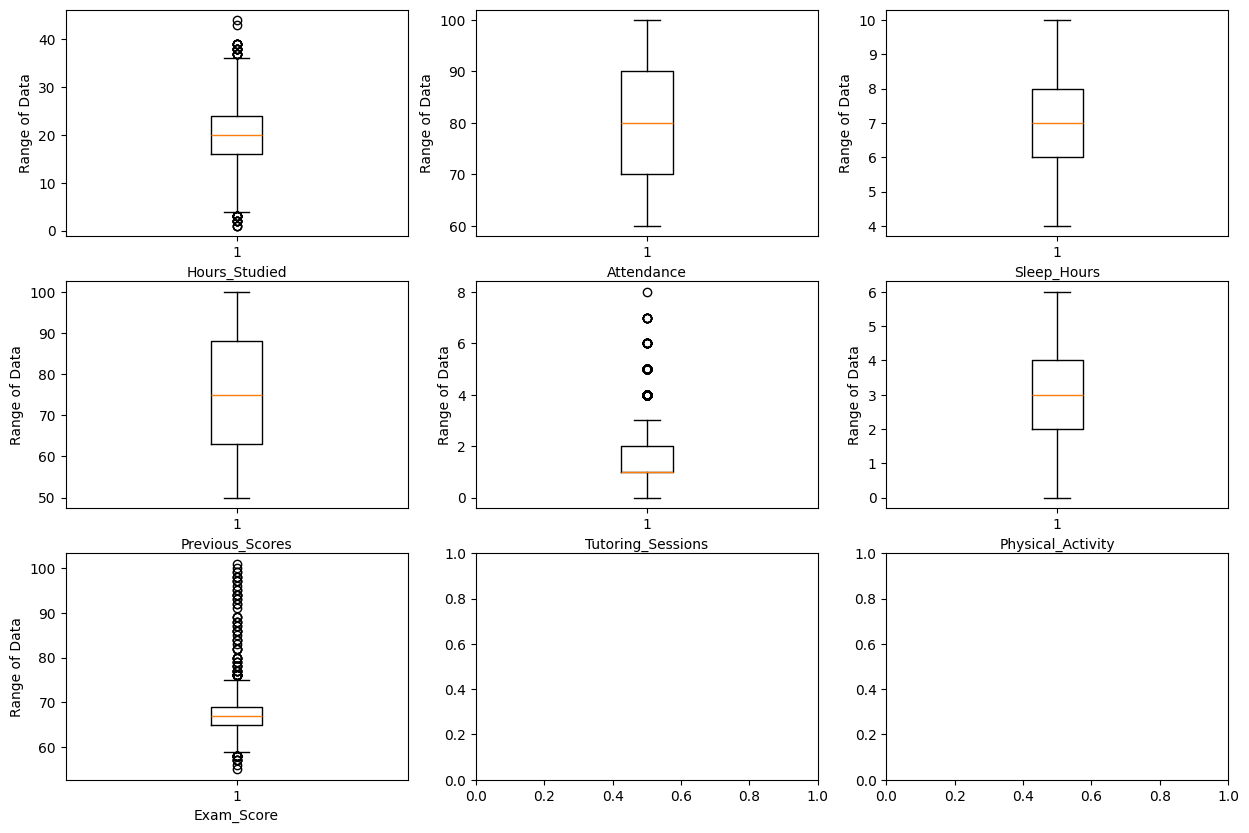

In [39]:
fig,ax=plt.subplots(3,3,figsize=(15,10))
i=0
j=0
for col in num_columns:
  ax[i][j].boxplot(df[col])
  ax[i][j].set_xlabel(f"{col}")
  ax[i][j].set_ylabel("Range of Data")
  j=j+1
  if j==3:
    i=i+1
    j=0
plt.show()

### Pie Plot

In [42]:
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [43]:
len(cat_cols)

13

/tmp/ipython-input-1294010727.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax[i][j].pie(pd.value_counts(df[col]),labels=pd.value_counts(df[col]).index,autopct='%1.1f%%')
/tmp/ipython-input-1294010727.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax[i][j].pie(pd.value_counts(df[col]),labels=pd.value_counts(df[col]).index,autopct='%1.1f%%')
/tmp/ipython-input-1294010727.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax[i][j].pie(pd.value_counts(df[col]),labels=pd.value_counts(df[col]).index,autopct='%1.1f%%')
/tmp/ipython-input-1294010727.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax[i][j].pie(pd.value_counts(df

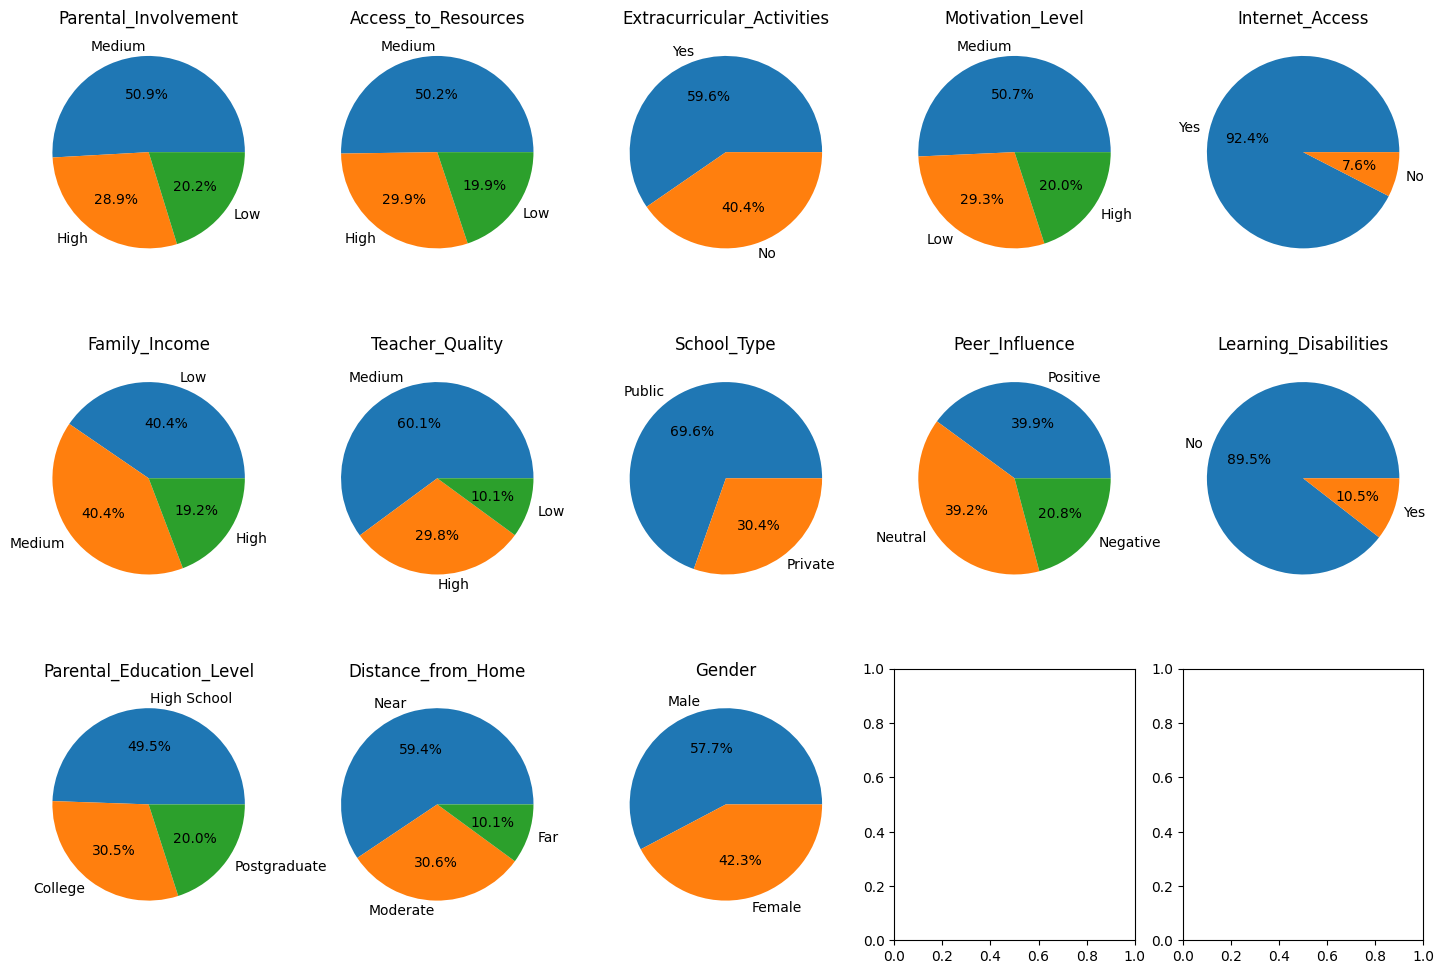

In [52]:
#BT24CSE201
fig,ax=plt.subplots(3,5,figsize=(18,12))
i=0
j=0
for col in cat_cols:
  ax[i][j].pie(pd.value_counts(df[col]),labels=pd.value_counts(df[col]).index,autopct='%1.1f%%')
  ax[i][j].set_title(f"{col}")
  j=j+1
  if j==5:
    i=i+1
    j=0
plt.show()

# Bivariate Analysis

### Scatter Plot(Numerical Columns Impact On Exam Score)

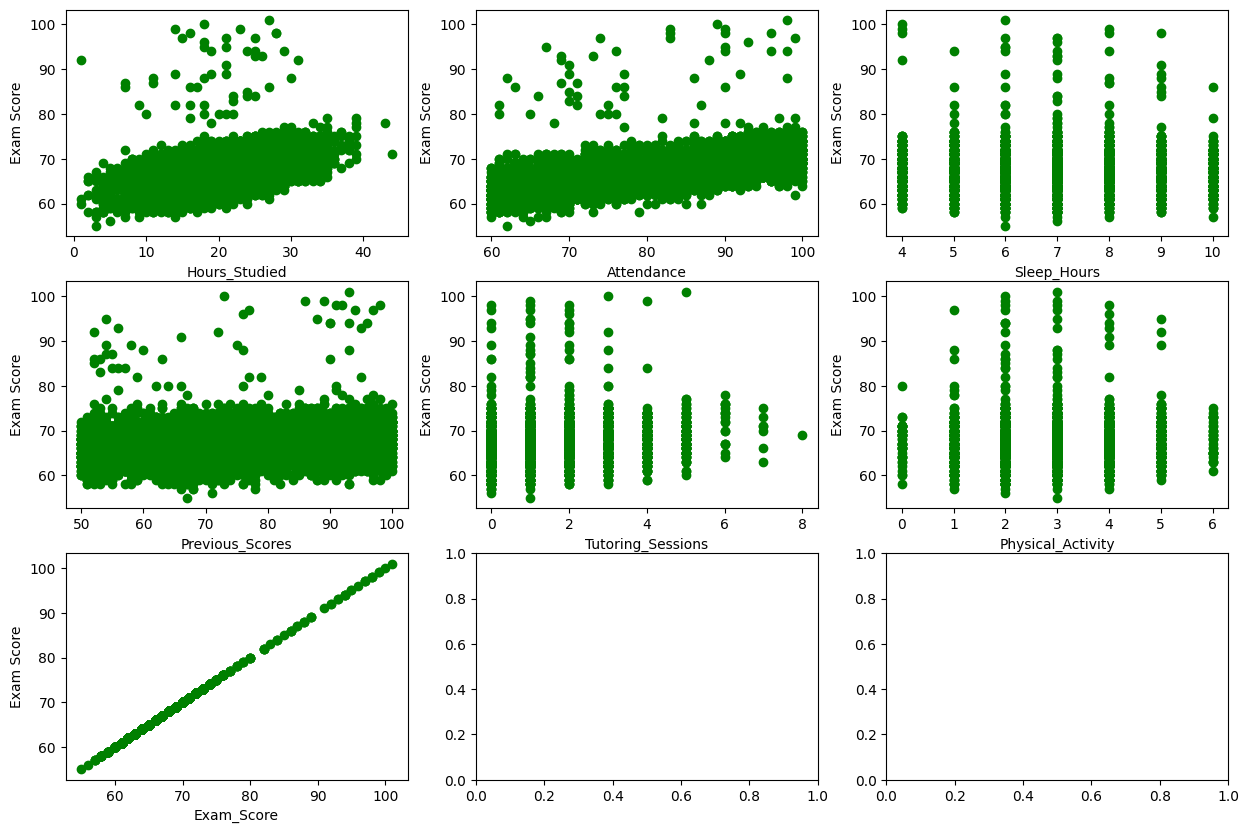

In [84]:
fig,ax=plt.subplots(3,3,figsize=(15,10))
i=0
j=0
for col in num_columns:
  ax[i][j].scatter(x=df[col],y=df['Exam_Score'],color='green')
  ax[i][j].set_xlabel(f"{col}")
  ax[i][j].set_ylabel("Exam Score")
  j=j+1
  if j==3:
    i=i+1
    j=0
plt.show()

### Bar Plot(Categorical Column Impact On Exam Score)

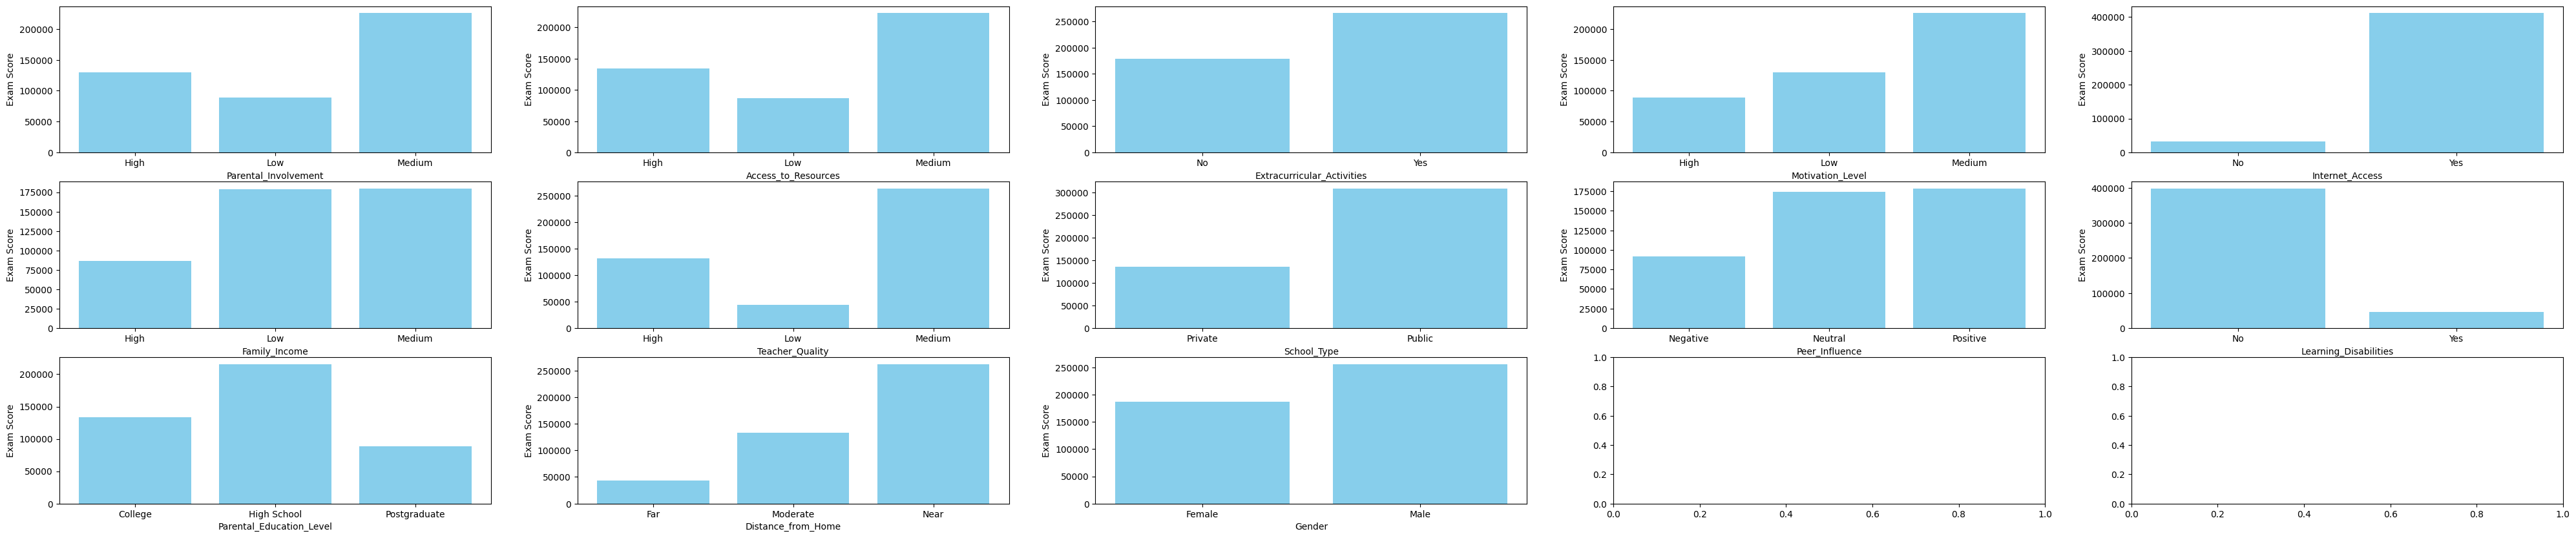

In [78]:
fg,ax=plt.subplots(3,5,figsize=(50,10))
i=0
j=0
for col in cat_cols:
  grp=df.groupby(col)['Exam_Score'].sum()
  ax[i][j].bar(x=grp.index,height=grp.values,color='skyblue')
  ax[i][j].set_xlabel(f"{col}")
  ax[i][j].set_ylabel("Exam Score")
  j=j+1
  if j==5:
    i=i+1
    j=0
plt.show()

### Line Plot

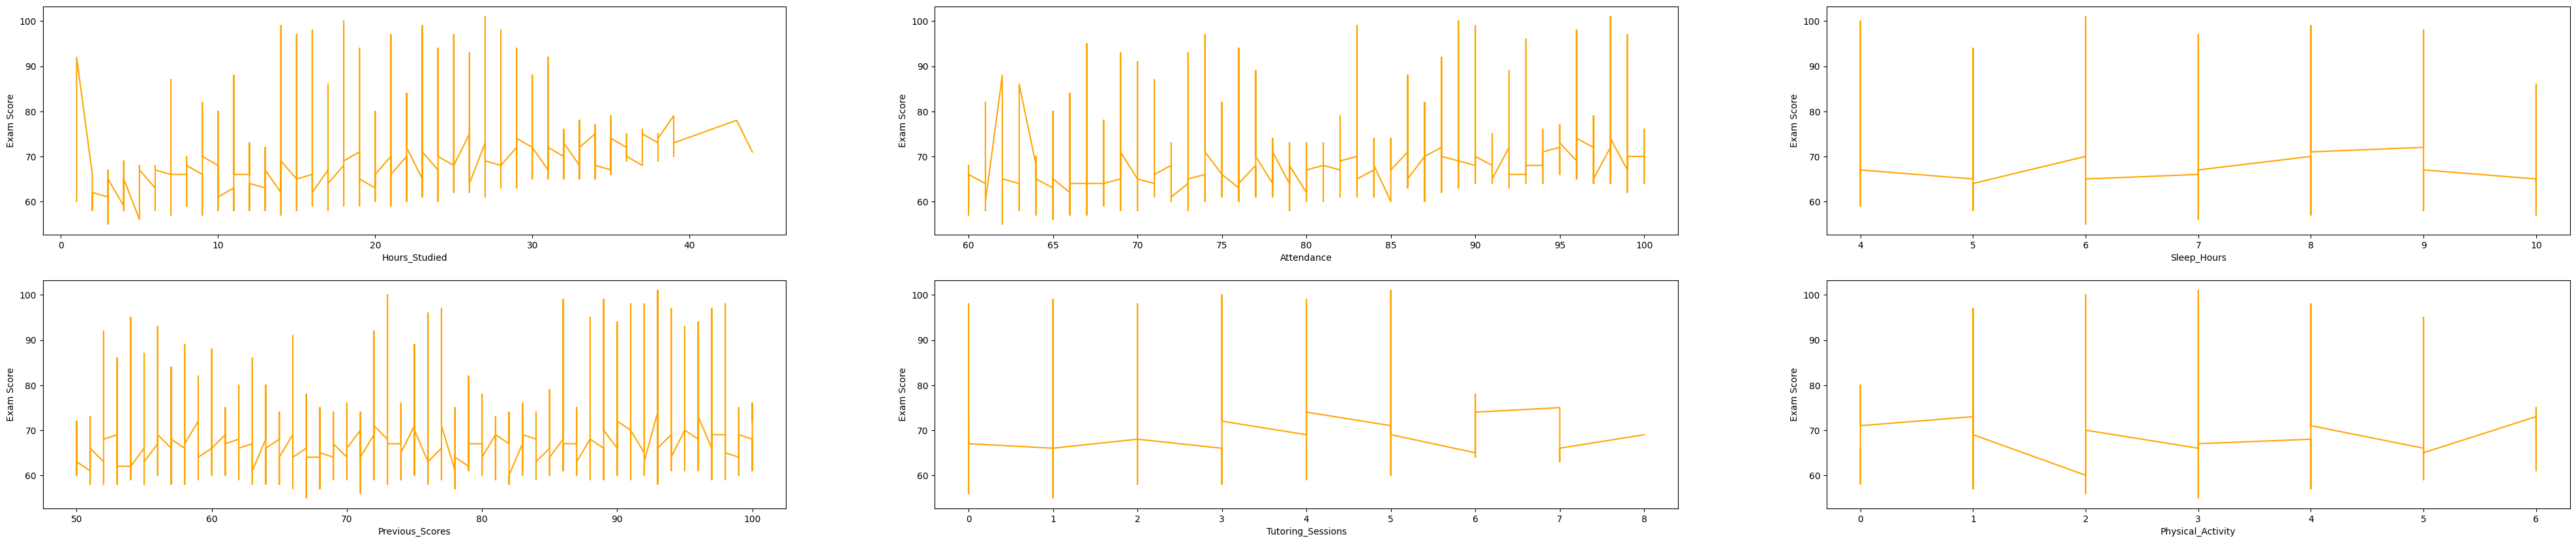

In [94]:
fig,ax=plt.subplots(2,3,figsize=(50,10))
i=0
j=0
for col in num_columns[:-1]:
  temp=df[[col,'Exam_Score']].sort_values(col)
  ax[i][j].plot(temp[col],temp['Exam_Score'],color='orange')
  ax[i][j].set_xlabel(f"{col}")
  ax[i][j].set_ylabel("Exam Score")
  j=j+1
  if j==3:
    i=i+1
    j=0
plt.show()